In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/MMMetricClaculations.csv")
data.head()

,video_name,original_lang,translated_to,length,meh_moments,whisper_size,split_sentences
0,MinecraftSpanish,english,spanish,50,2,small,0
1,MinecraftSpanish,english,russian,120,16,medium,1
2,ListeningEnglish,english,spanish,120,8,medium,1
3,MinutePhysicsRussian,russian,english,121,5,medium,1
4,PlanningRussian,russian,spanish,270,18,medium,1


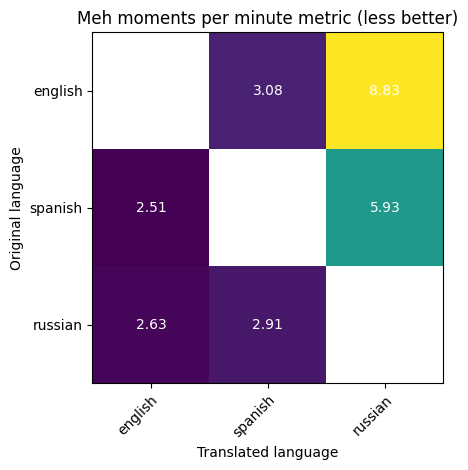

In [14]:
languages = ["english", "spanish", "russian"]
metric_table = []
for orig_lang in languages:
    metric_table.append([])
    for trans_lang in languages:
        if orig_lang == trans_lang:
            metric = float("inf")
        else:
            data_ = data[(data["original_lang"] == orig_lang) & (data["translated_to"] == trans_lang)]
            metric = round(np.mean(data_["meh_moments"] / data_["length"] * 60), 2)
        metric_table[-1].append(metric)
        
        
metric_table = np.array(metric_table)

fig, ax = plt.subplots()
im = ax.imshow(metric_table)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(languages)), labels=languages)
ax.set_yticks(np.arange(len(languages)), labels=languages)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(languages)):
    for j in range(len(languages)):
        if i == j:
            continue
        text = ax.text(j, i, metric_table[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Meh moments per minute metric (less better)")
ax.set_ylabel("Original language")
ax.set_xlabel("Translated language")
fig.tight_layout()
plt.show()

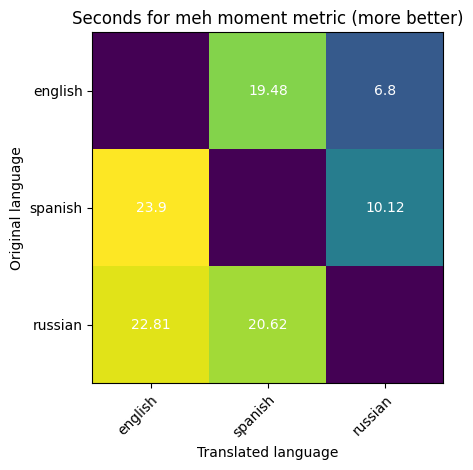

In [15]:
metric_table = np.round(1 / metric_table * 60, 2)

fig, ax = plt.subplots()
im = ax.imshow(metric_table)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(languages)), labels=languages)
ax.set_yticks(np.arange(len(languages)), labels=languages)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(languages)):
    for j in range(len(languages)):
        if i == j:
            continue
        text = ax.text(j, i, metric_table[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Seconds for meh moment metric (more better)")
ax.set_ylabel("Original language")
ax.set_xlabel("Translated language")
fig.tight_layout()
plt.show()